## Decision Trees

### Import the class containing the classification method


In [1]:
from sklearn.tree import DecisionTreeClassifier

##### Load other utility modules 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split

#### Load dataset (breast cancer)

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
print(cancer.target_names)

['malignant' 'benign']


In [7]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

#### Train/Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [11]:
# tree visualization

In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)

In [14]:
print(tree_dot)

digraph Tree {
node [shape=box] ;
0 [label="worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]"] ;
1 [label="worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.008\nsamples = 240\nvalue = [1, 239]"] ;
1 -> 2 ;
3 [label="gini = 0.499\nsamples = 19\nvalue = [10, 9]"] ;
1 -> 3 ;
4 [label="worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.497\nsamples = 37\nvalue = [20, 17]"] ;
4 -> 5 ;
6 [label="gini = 0.03\nsamples = 130\nvalue = [128, 2]"] ;
4 -> 6 ;
}


In [15]:
# Showing dot files in Jupyter
# Requires graphviz C library and Python library
# conda install graphviz python-graphviz 

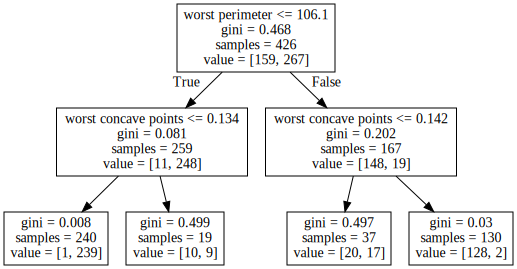

In [16]:
import graphviz
graphviz.Source(tree_dot)

In [17]:
# copy the file "tree_plotting.py" into the same folder of notebook

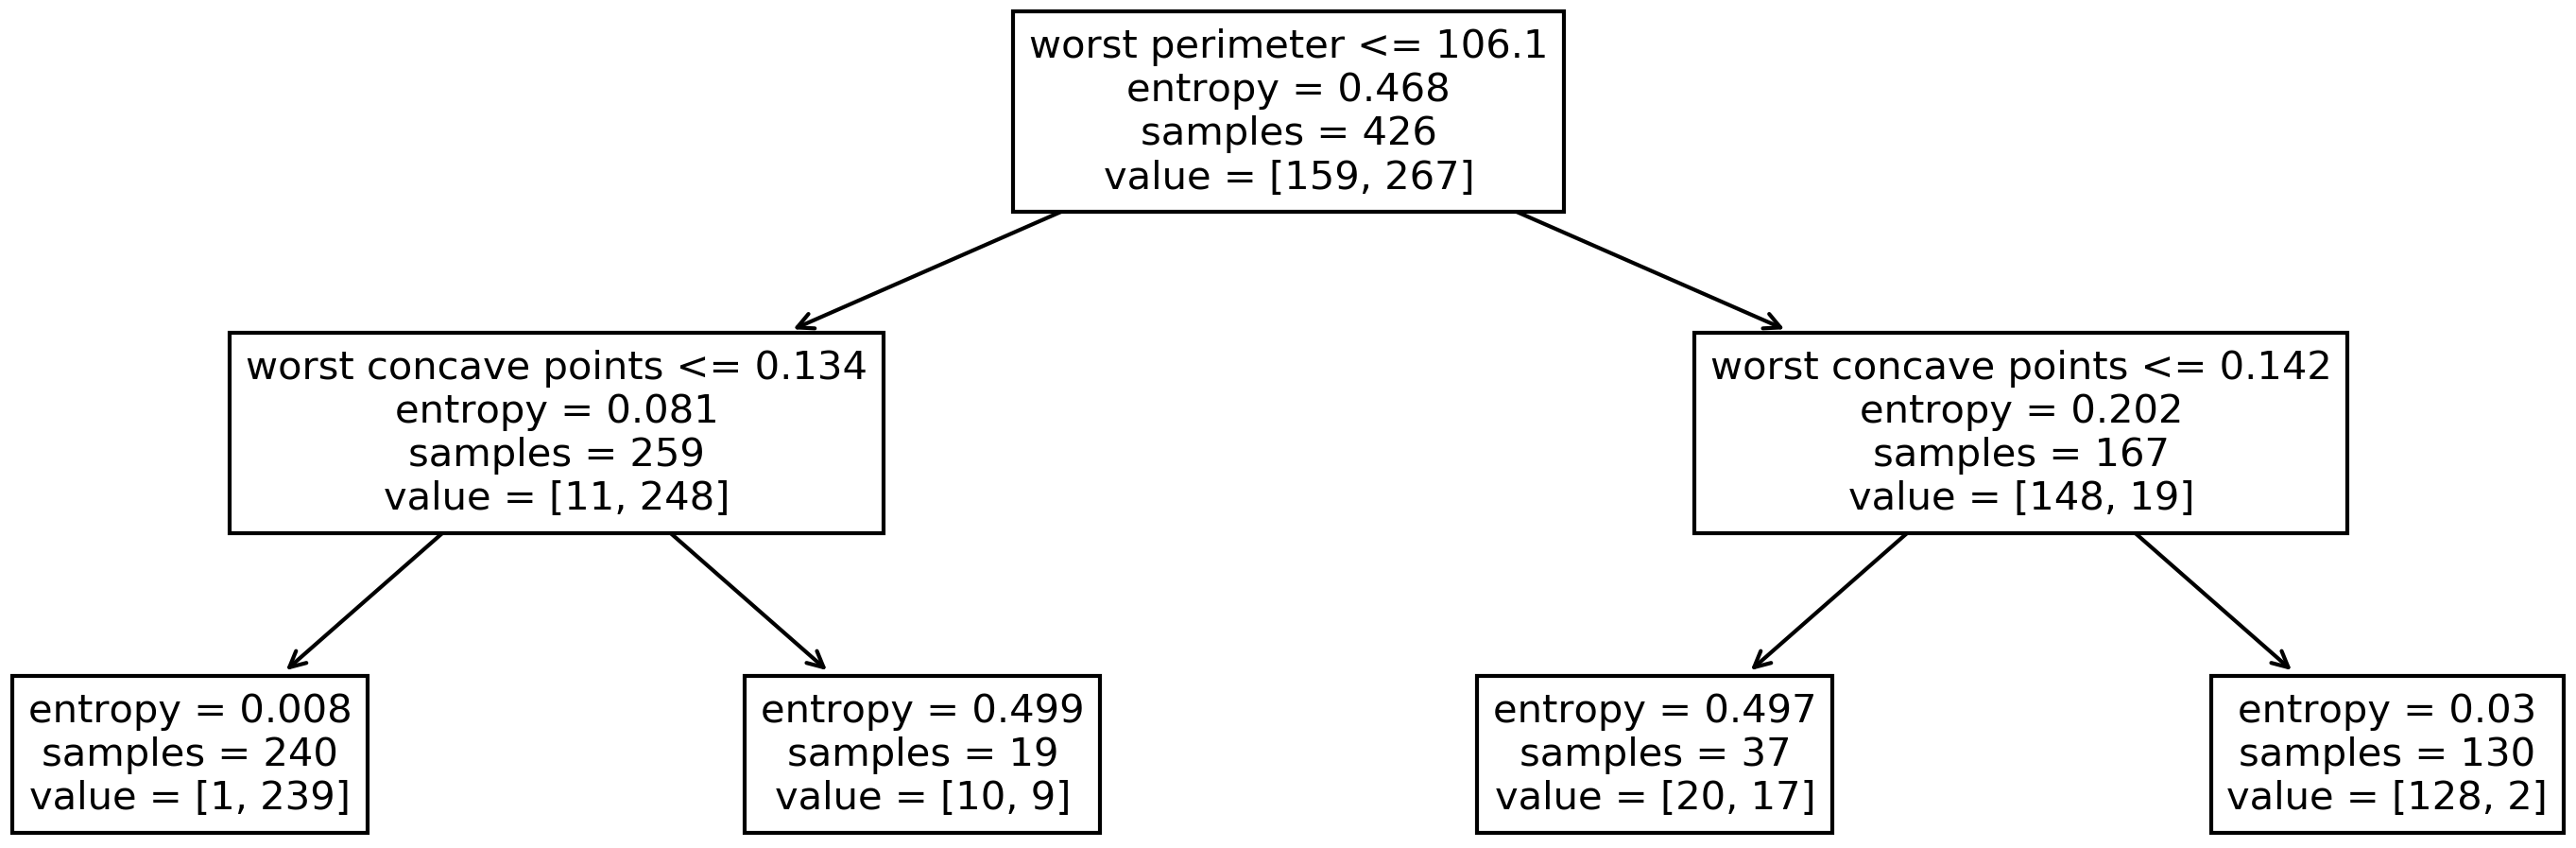

In [18]:
from tree_plotting import plot_tree
plt.figure(figsize=(10, 3))
tree_dot = plot_tree(tree, feature_names=cancer.feature_names)
plt.savefig("images/mpl_tree_plot.png")

# Parameter Tuning

### No pre-pruning

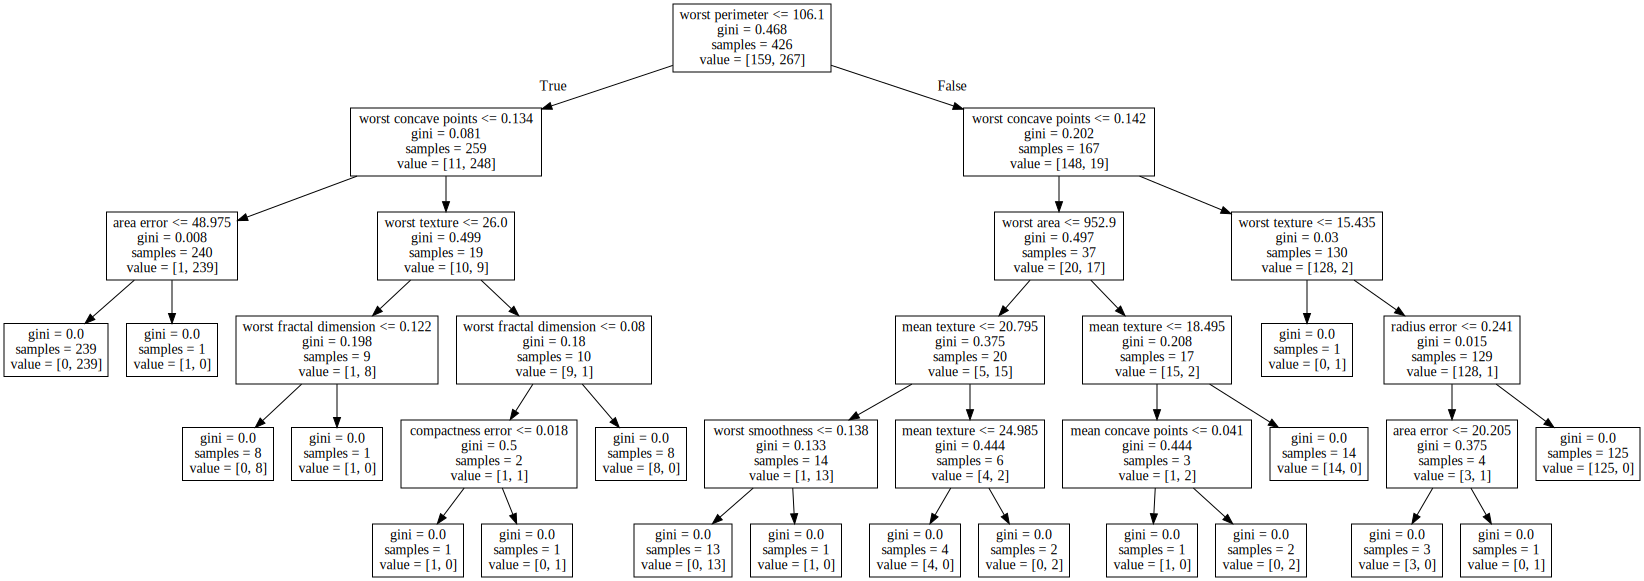

In [19]:
tree = DecisionTreeClassifier()
tree=tree.fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/no_pre_pruning", cleanup=True)
graph

### Pre-pruning: max_depth=1

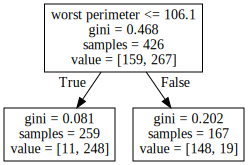

In [20]:
tree = DecisionTreeClassifier(max_depth=1)
tree=tree.fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/max_depth_1", cleanup=True)
graph

### Pre-pruning: max_leaf_nodes=8
##### We will obtain the tree with <= 8 leaf nodes

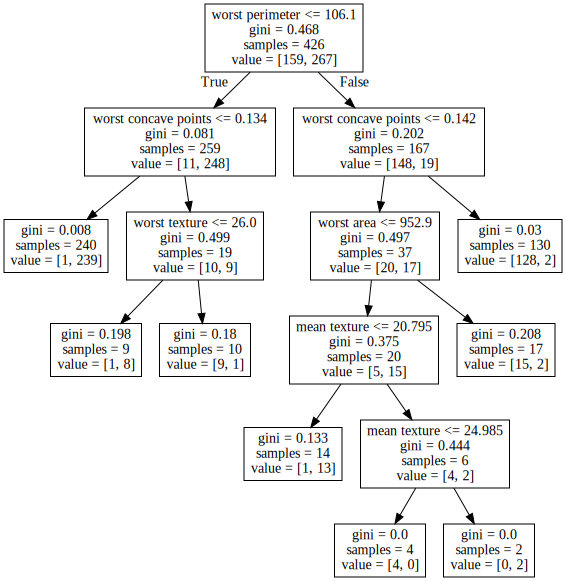

In [21]:
tree = DecisionTreeClassifier(max_leaf_nodes=8)
tree=tree.fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/max_leaf_nodes_8", cleanup=True)
graph

### Pre-pruning: min_samples_split=50
#####  min_samples_split: The minimum number of samples required to split an internal node

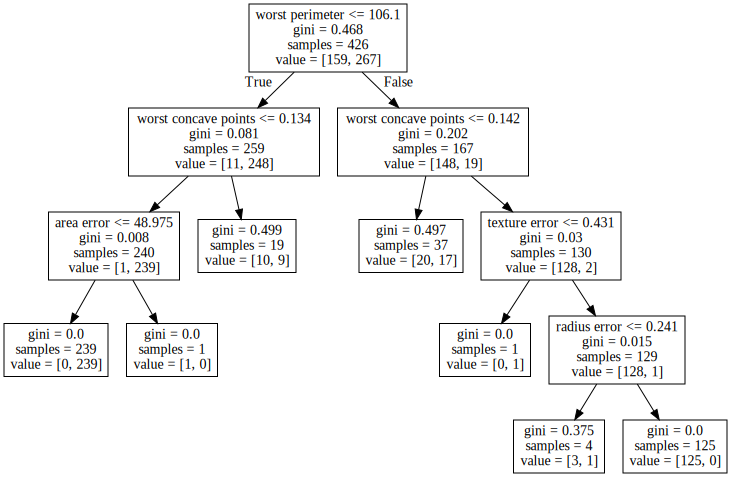

In [22]:
tree = DecisionTreeClassifier(min_samples_split=50)
tree=tree.fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="images/min_samples_split_50", cleanup=True)
graph

### Grid-Search with Cross-Validation to find max_depth

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1,7)}
#param_grid = {'max_depth':range(1, 11), 'min_samples_split':[5, 10, 15, 20]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 7)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [24]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1,7)}
#param_grid = {'max_depth':range(1, 11), 'min_samples_split':[5, 10, 15, 20]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100), return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
#scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
#scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())


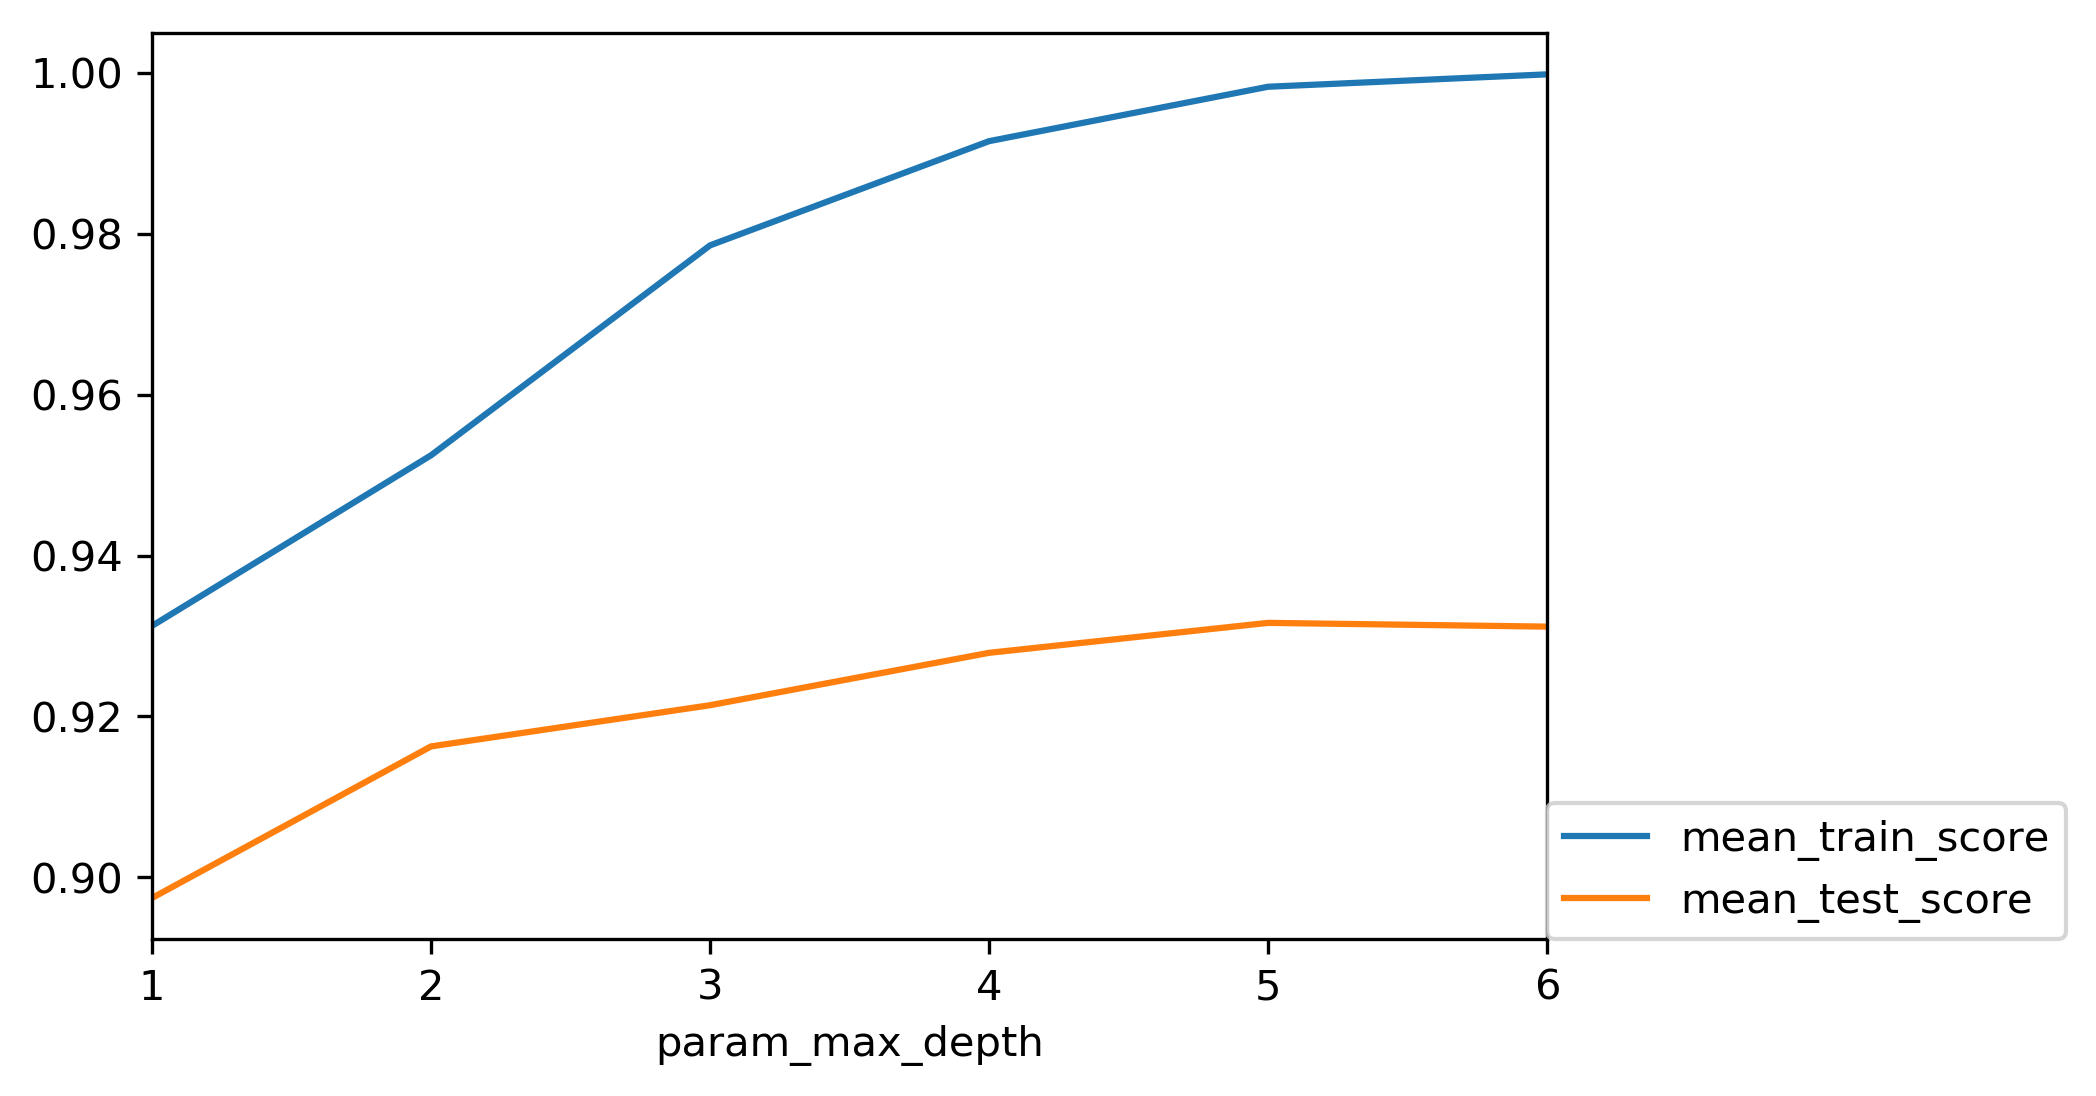

In [25]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

In [26]:
scores

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split10_test_score,...,split98_test_score,split98_train_score,split99_test_score,split99_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000827,0.000176,0.897442,0.931253,1,{'max_depth': 1},6,0.906977,0.929504,0.930233,...,0.930233,0.929504,0.906977,0.932115,0.953488,0.926893,0.003051,0.001559,0.035892,0.003600
1,0.001290,0.000333,0.916279,0.952454,2,{'max_depth': 2},5,0.883721,0.945170,0.953488,...,0.930233,0.932115,0.930233,0.939948,0.930233,0.932115,0.004000,0.002189,0.040946,0.012114
2,0.002188,0.000000,0.921395,0.978538,3,{'max_depth': 3},4,0.860465,0.973890,0.953488,...,0.953488,0.984334,0.930233,0.981723,0.953488,0.979112,0.005422,0.000000,0.035541,0.004171
3,0.002917,0.000166,0.927907,0.991488,4,{'max_depth': 4},3,0.837209,1.000000,0.930233,...,0.883721,0.994778,0.906977,0.994778,0.930233,0.992167,0.005982,0.001557,0.036252,0.004220
4,0.002813,0.000000,0.931628,0.998251,5,{'max_depth': 5},1,0.837209,1.000000,0.930233,...,0.930233,1.000000,0.930233,0.997389,0.930233,1.000000,0.006003,0.000000,0.039304,0.002091
5,0.002813,0.000000,0.931163,0.999791,6,{'max_depth': 6},2,0.837209,1.000000,0.930233,...,0.930233,1.000000,0.930233,1.000000,0.930233,1.000000,0.006003,0.000000,0.035562,0.000880


In [27]:
grid.best_params_

{'max_depth': 5}

In [28]:
grid.best_score_

0.9316279069767441

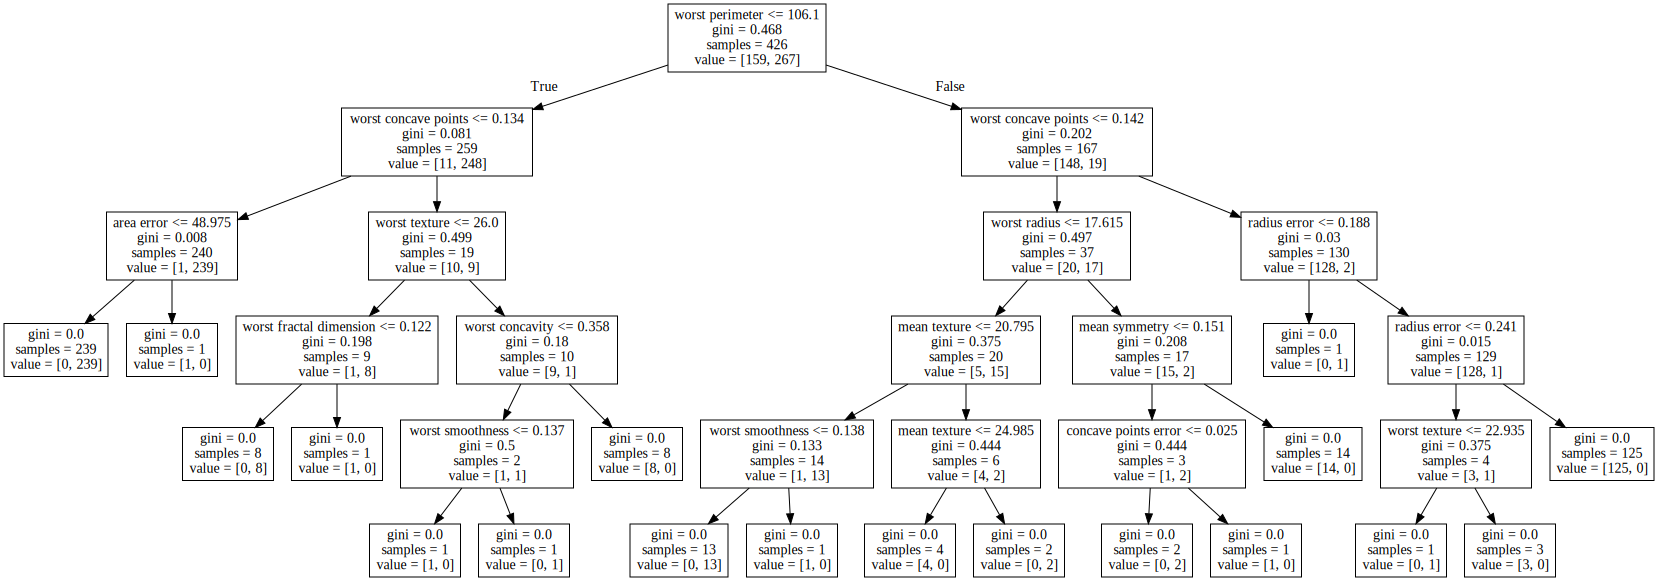

In [29]:
best_tree=grid.best_estimator_
tree_dot = export_graphviz(best_tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph

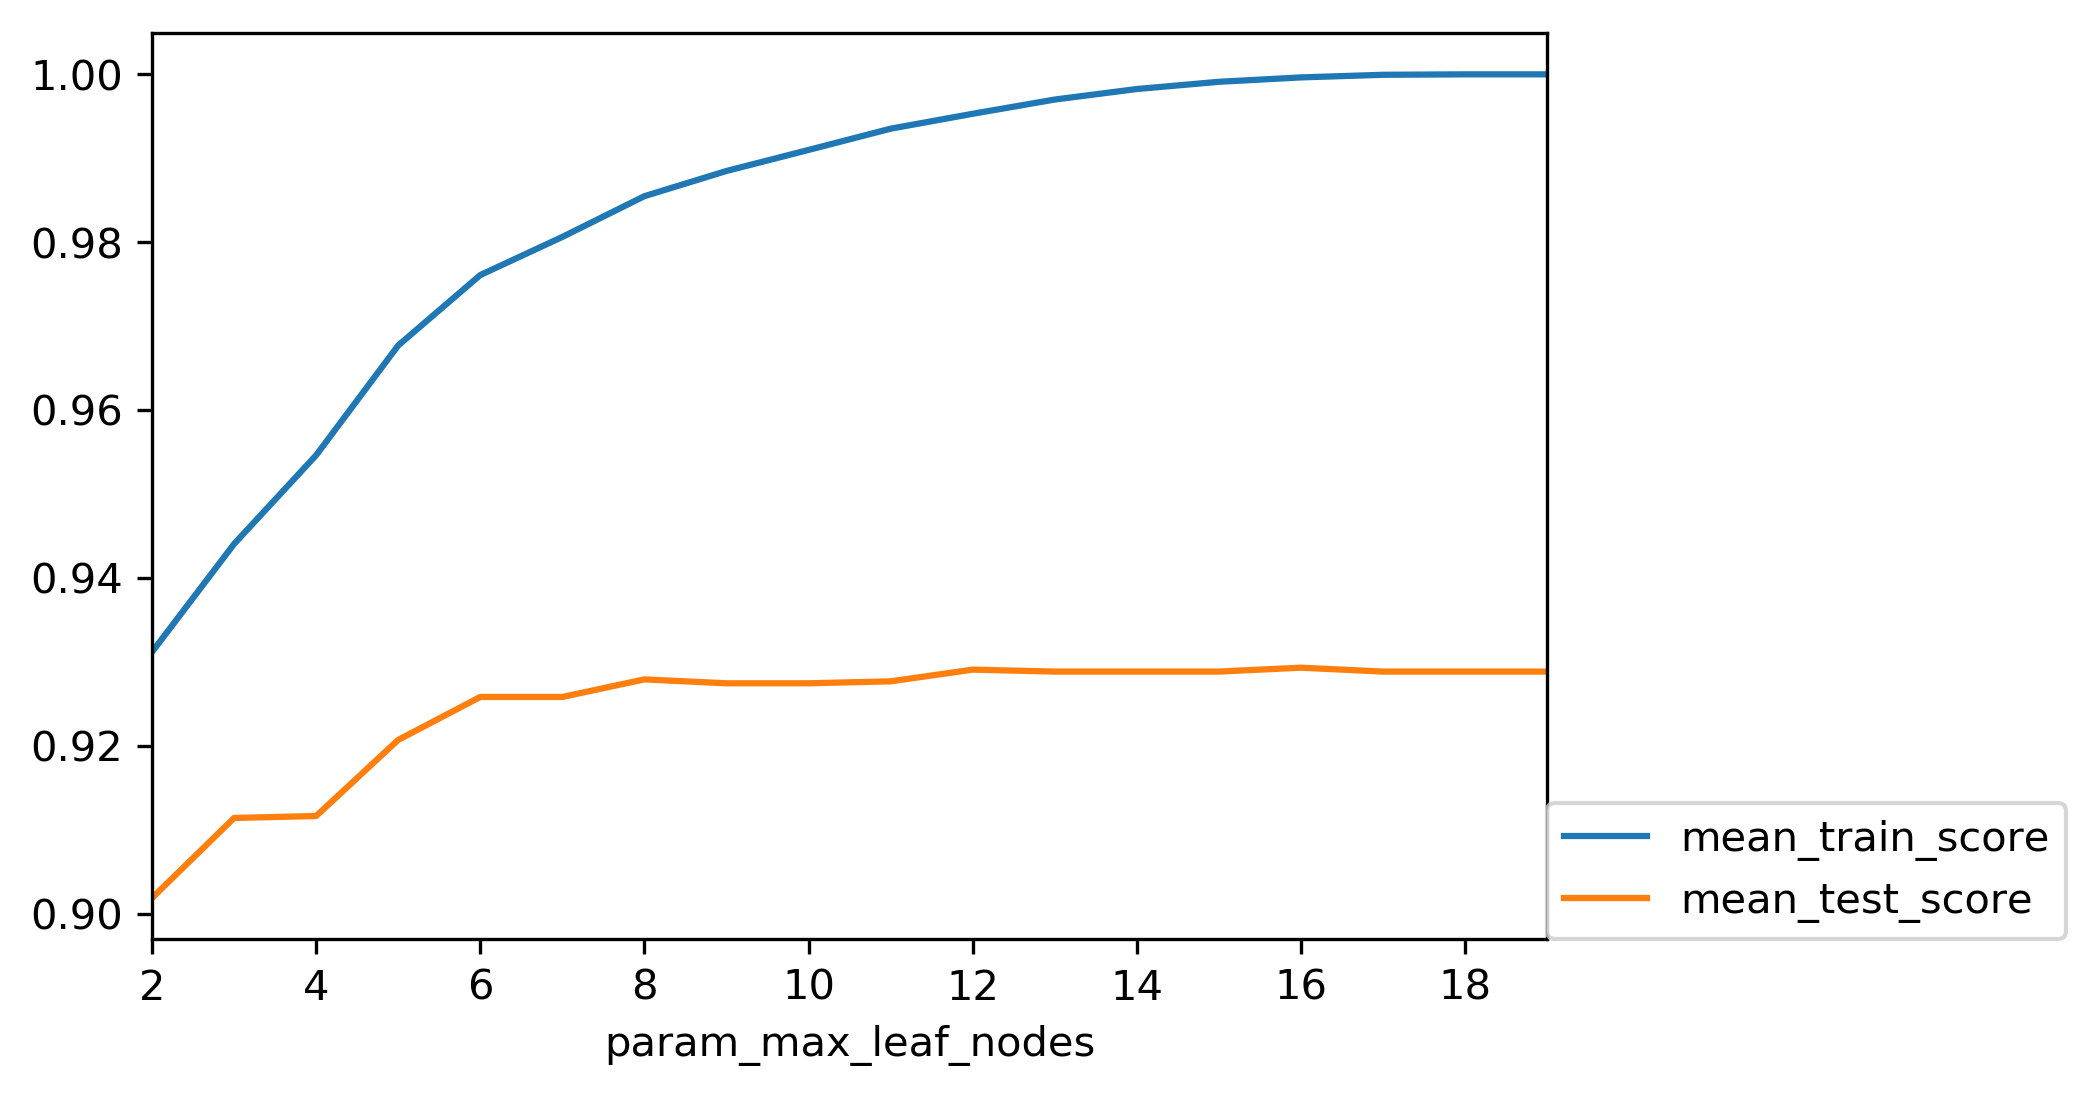

In [30]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_leaf_nodes':range(2, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100), return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

In [31]:
scores

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_leaf_nodes,params,rank_test_score,split0_test_score,split0_train_score,split10_test_score,...,split98_test_score,split98_train_score,split99_test_score,split99_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001859,0.000040,0.901860,0.931175,2,{'max_leaf_nodes': 2},18,0.906977,0.932115,0.883721,...,0.883721,0.934726,0.906977,0.929504,0.883721,0.934726,0.004176,0.000196,0.038995,0.003811
1,0.002031,0.000156,0.911395,0.944047,3,{'max_leaf_nodes': 3},17,0.906977,0.932115,0.883721,...,0.883721,0.942559,0.930233,0.958225,0.860465,0.945170,0.005255,0.001555,0.038170,0.013304
2,0.002344,0.000313,0.911628,0.954621,4,{'max_leaf_nodes': 4},16,0.906977,0.960836,0.883721,...,0.883721,0.945170,0.953488,0.971279,0.837209,0.958225,0.005579,0.002187,0.034494,0.012273
3,0.002582,0.000010,0.920698,0.967702,5,{'max_leaf_nodes': 5},15,0.930233,0.971279,0.930233,...,0.906977,0.963446,0.953488,0.971279,0.883721,0.968668,0.005712,0.000100,0.031733,0.007099
4,0.002188,0.000000,0.925814,0.976084,6,{'max_leaf_nodes': 6},13,0.906977,0.979112,0.930233,...,0.906977,0.979112,1.000000,0.981723,0.883721,0.976501,0.005422,0.000000,0.033972,0.004349
5,0.002500,0.000000,0.925814,0.980627,7,{'max_leaf_nodes': 7},13,0.906977,0.981723,0.883721,...,0.906977,0.984334,1.000000,0.981723,0.883721,0.976501,0.005728,0.000000,0.033812,0.003526
6,0.002188,0.000469,0.927907,0.985483,8,{'max_leaf_nodes': 8},9,0.883721,0.984334,0.883721,...,0.906977,0.984334,1.000000,0.986945,0.883721,0.984334,0.005422,0.002665,0.034884,0.003661
7,0.002969,0.000156,0.927442,0.988486,9,{'max_leaf_nodes': 9},11,0.883721,0.984334,0.860465,...,0.930233,0.994778,1.000000,0.989556,0.883721,0.986945,0.006130,0.001555,0.035769,0.003785
8,0.002344,0.000156,0.927442,0.990992,10,{'max_leaf_nodes': 10},11,0.883721,0.989556,0.860465,...,0.930233,0.997389,1.000000,0.992167,0.906977,0.989556,0.005579,0.001555,0.035617,0.003862
9,0.002970,0.000156,0.927674,0.993525,11,{'max_leaf_nodes': 11},10,0.883721,0.992167,0.860465,...,0.930233,1.000000,1.000000,0.994778,0.906977,0.992167,0.006133,0.001555,0.036162,0.003271


In [32]:
grid.best_params_

{'max_leaf_nodes': 16}

In [33]:
grid.best_score_

0.9293023255813954

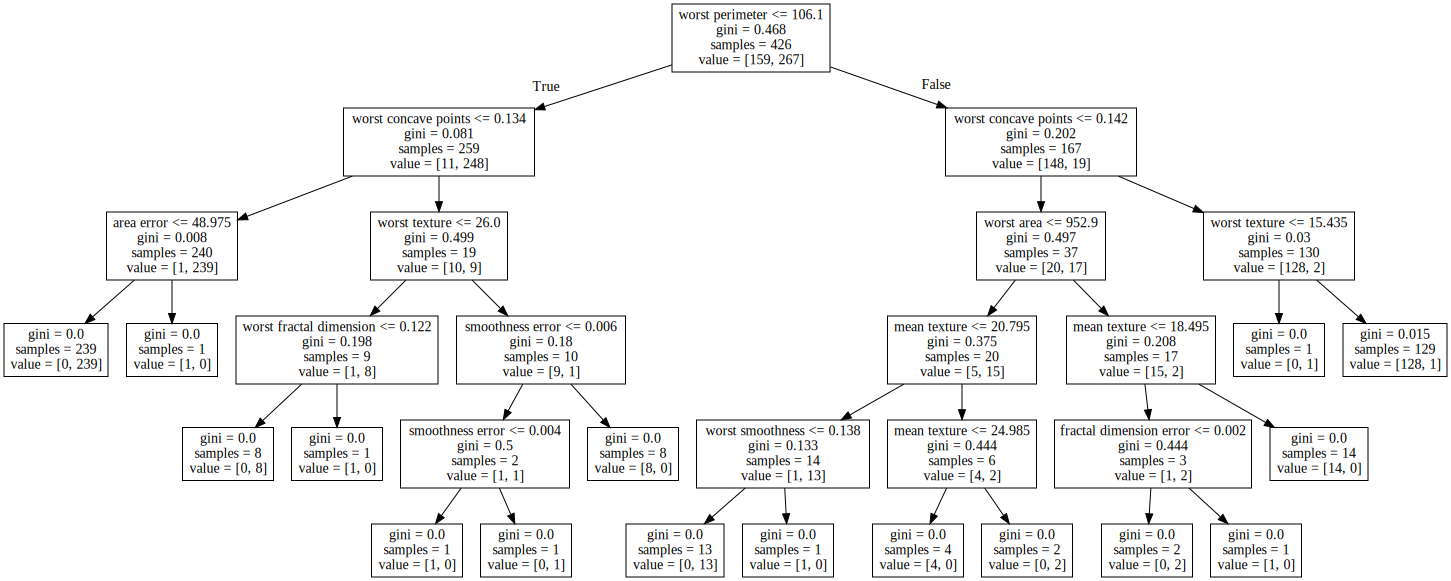

In [34]:
best_tree=grid.best_estimator_
tree_dot = export_graphviz(best_tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph

In [35]:
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier(n_estimators=50)
BC = BC.fit(X_train, y_train)
y_predict = BC.predict(X_test)

In [36]:
y_predict

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [37]:
y_test

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [38]:
print("accuracy: {:.2f}".format(BC.score(X_test, y_test)))

accuracy: 0.94


In [39]:
print("accuracy: {:.2f}".format(best_tree.score(X_test, y_test)))

accuracy: 0.92


### Random Forest: n_estimators=100 

In [41]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.944
